In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,16
import itertools
import matplotlib.pylab

In [11]:
df=pd.read_csv('D:\\python\\Titanic_ML\\co2_emission\\MER_T12_06.csv')

In [12]:
df.sample(5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
857,NNEIEUS,199506,21.198,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4603,TXEIEUS,197811,114.853,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1843,PCEIEUS,198403,.056,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
3364,PAEIEUS,201402,2.323,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2975,PAEIEUS,198403,9.047,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [14]:
date= lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce')
df=pd.read_csv('D:\\python\\Titanic_ML\\co2_emission\\MER_T12_06.csv', parse_dates=['YYYYMM'], index_col='YYYYMM', 
               date_parser=date)

In [15]:
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [16]:
df.Column_Order.value_counts()

7    566
3    566
6    566
2    566
9    566
5    566
1    566
8    566
4    566
Name: Column_Order, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             5094 non-null object
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


In [20]:
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [22]:
ts=df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]

In [23]:
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [24]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [34]:
ts['Value']=pd.to_numeric(ts['Value'], errors='coerce')

In [30]:
ts.dtypes

MSN              object
Value           float64
Column_Order      int64
Description      object
Unit             object
dtype: object

In [33]:
ts.dropna(inplace=True)

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
Energy_source=ts.groupby('Description')


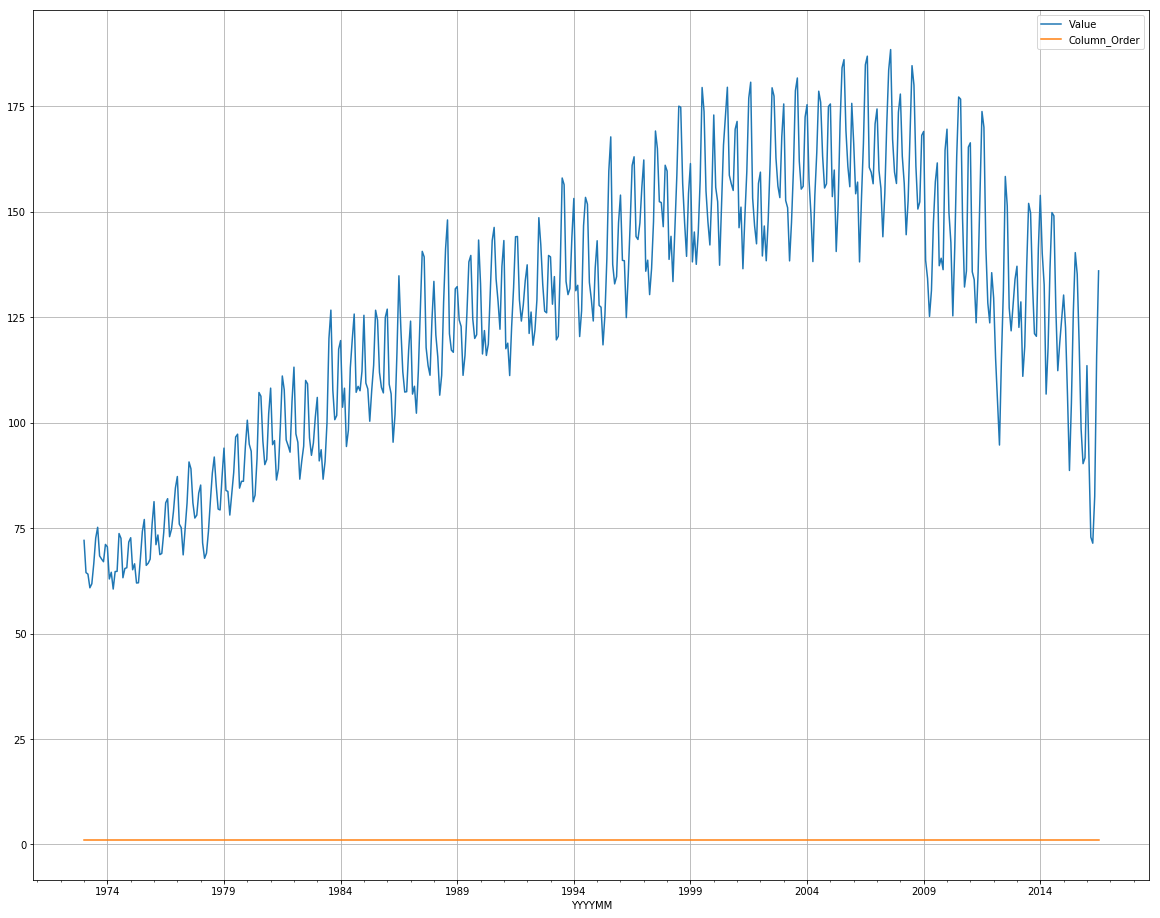

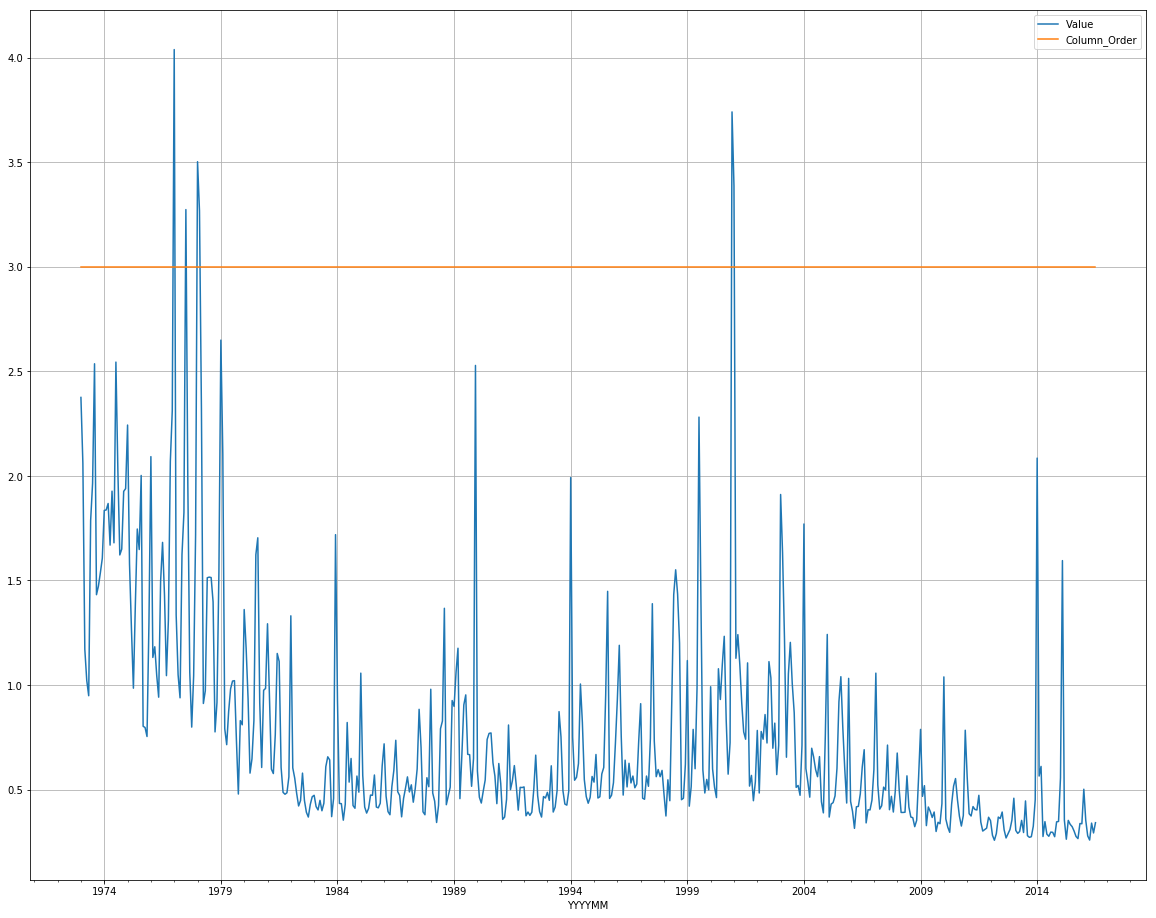

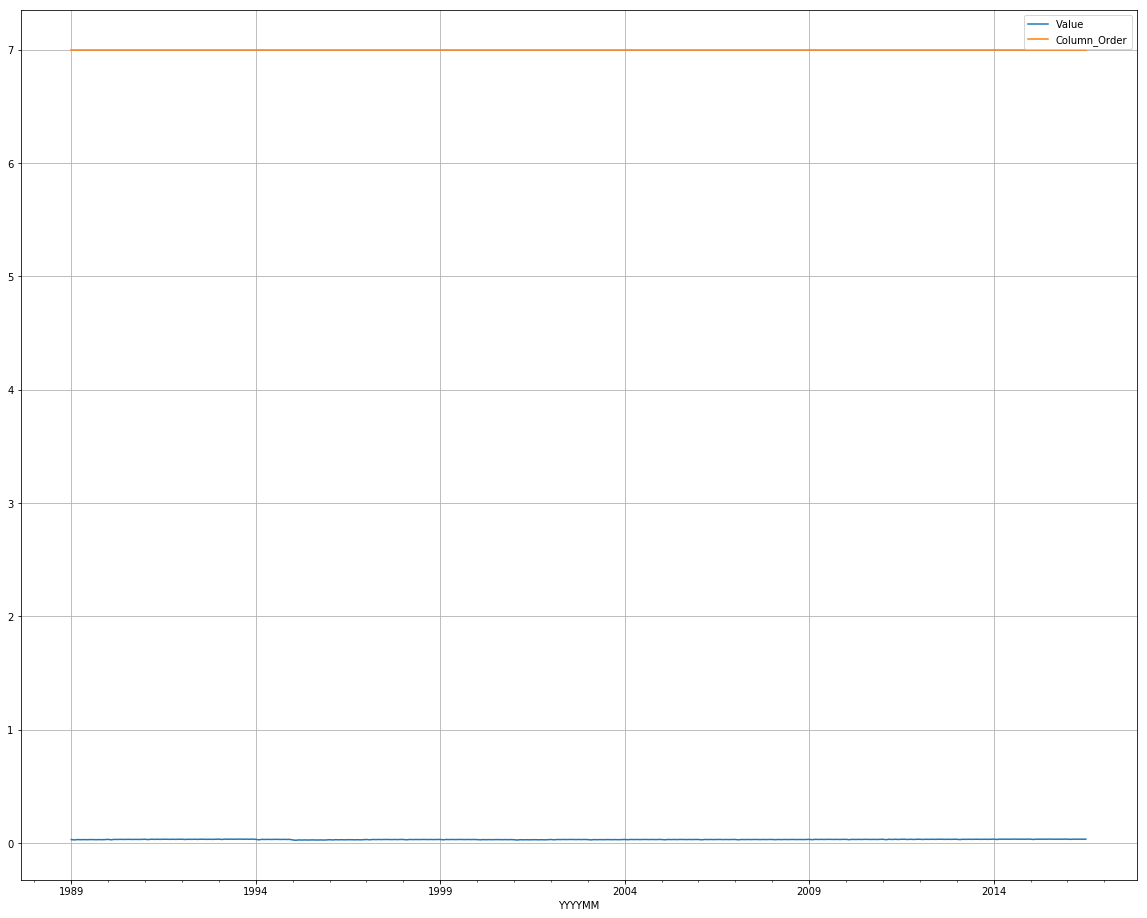

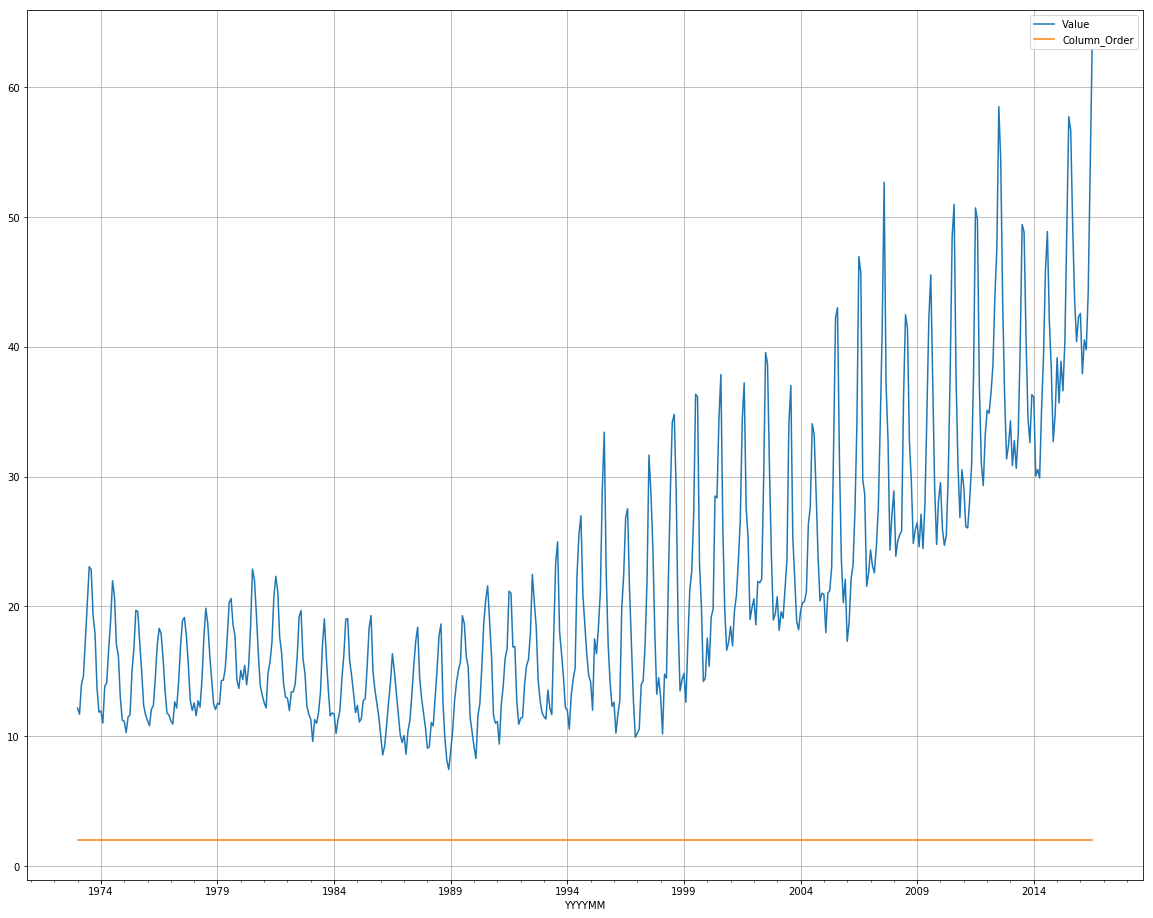

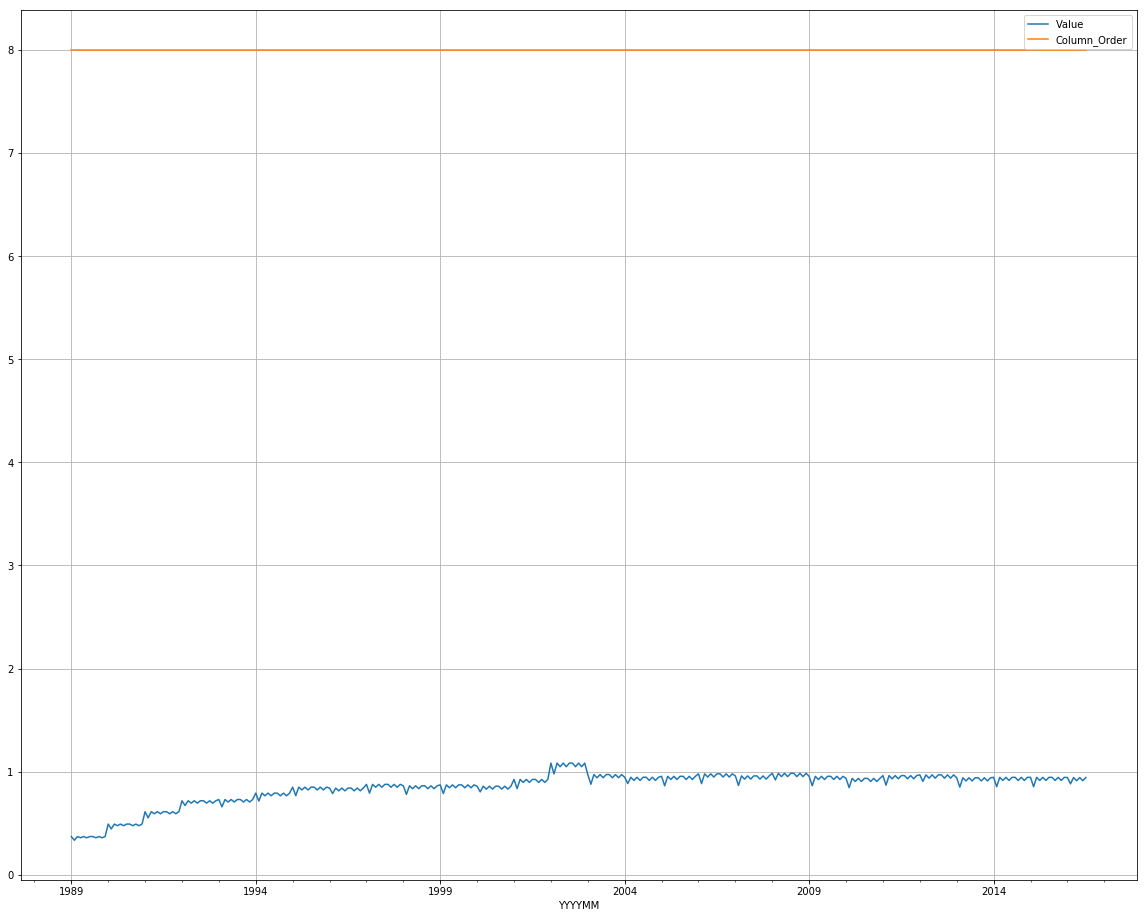

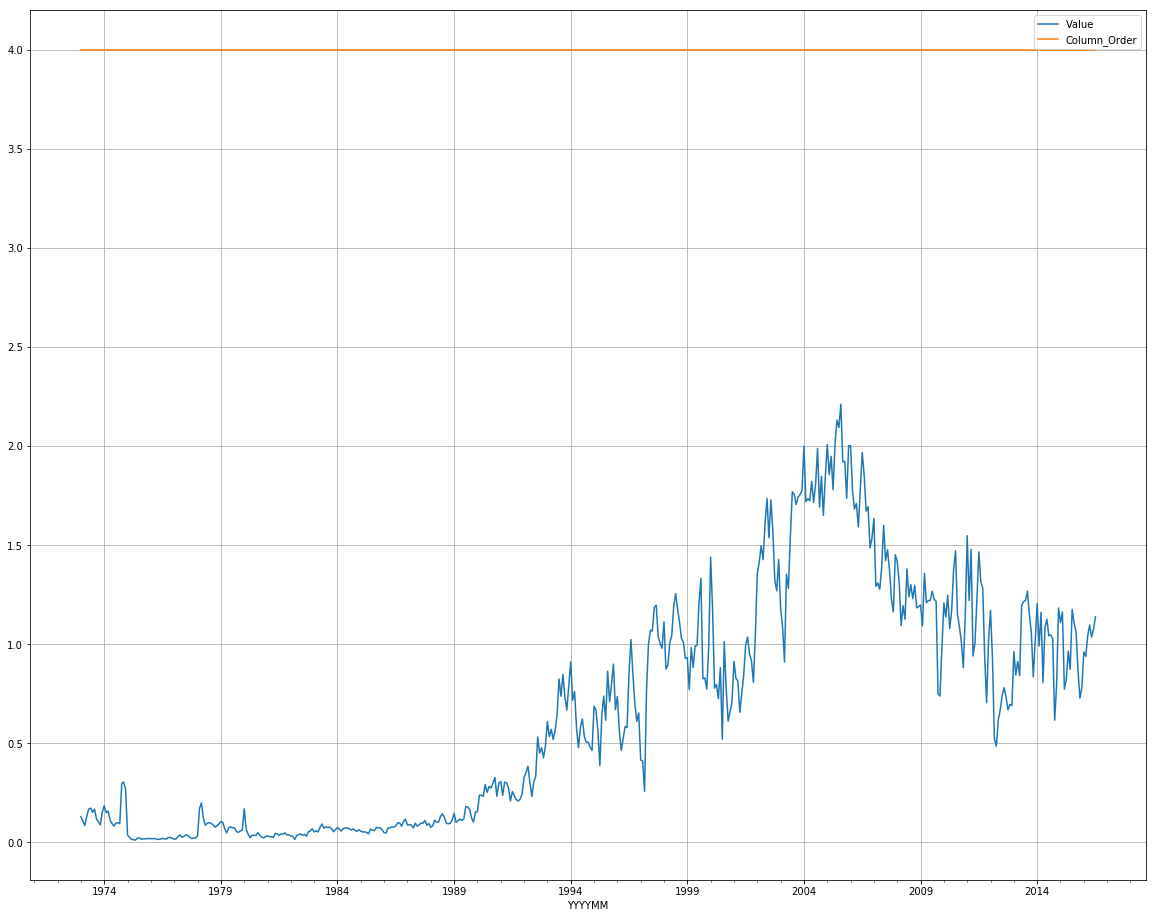

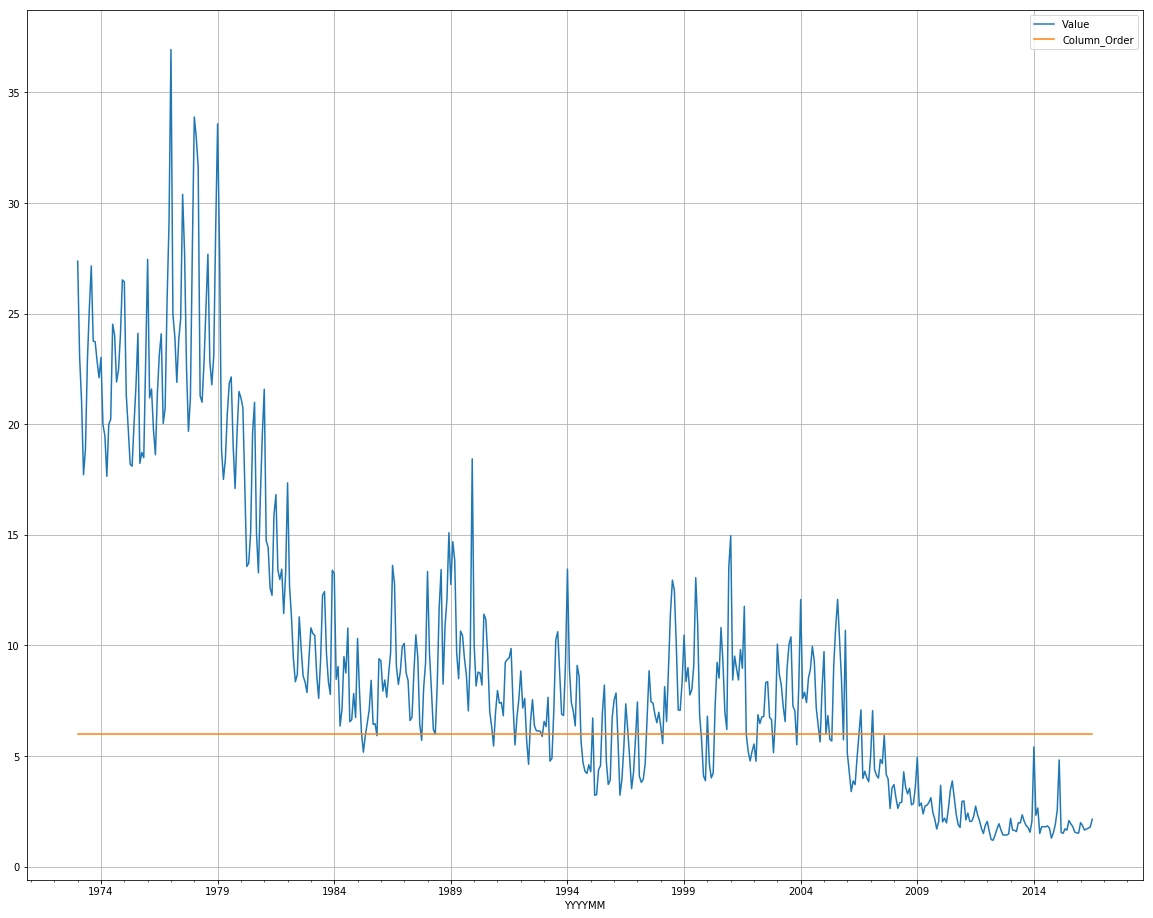

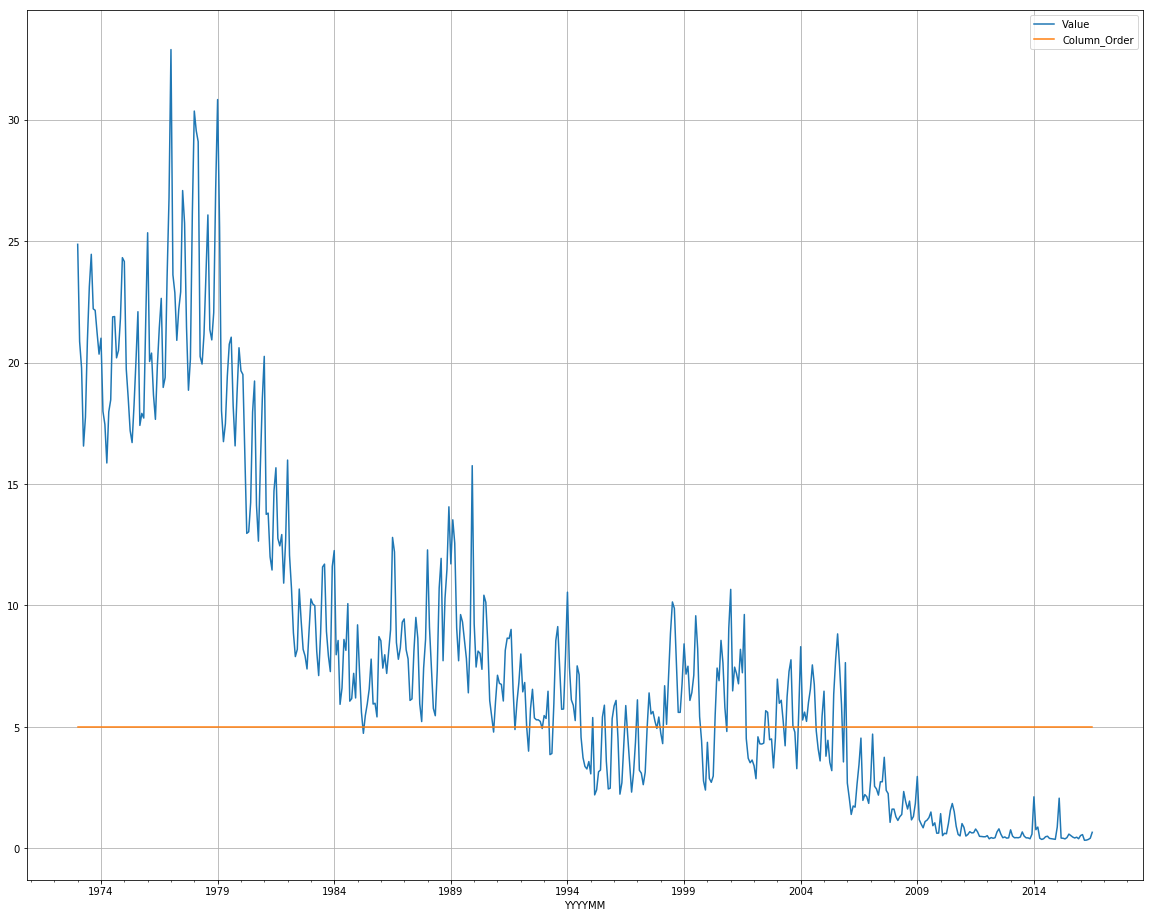

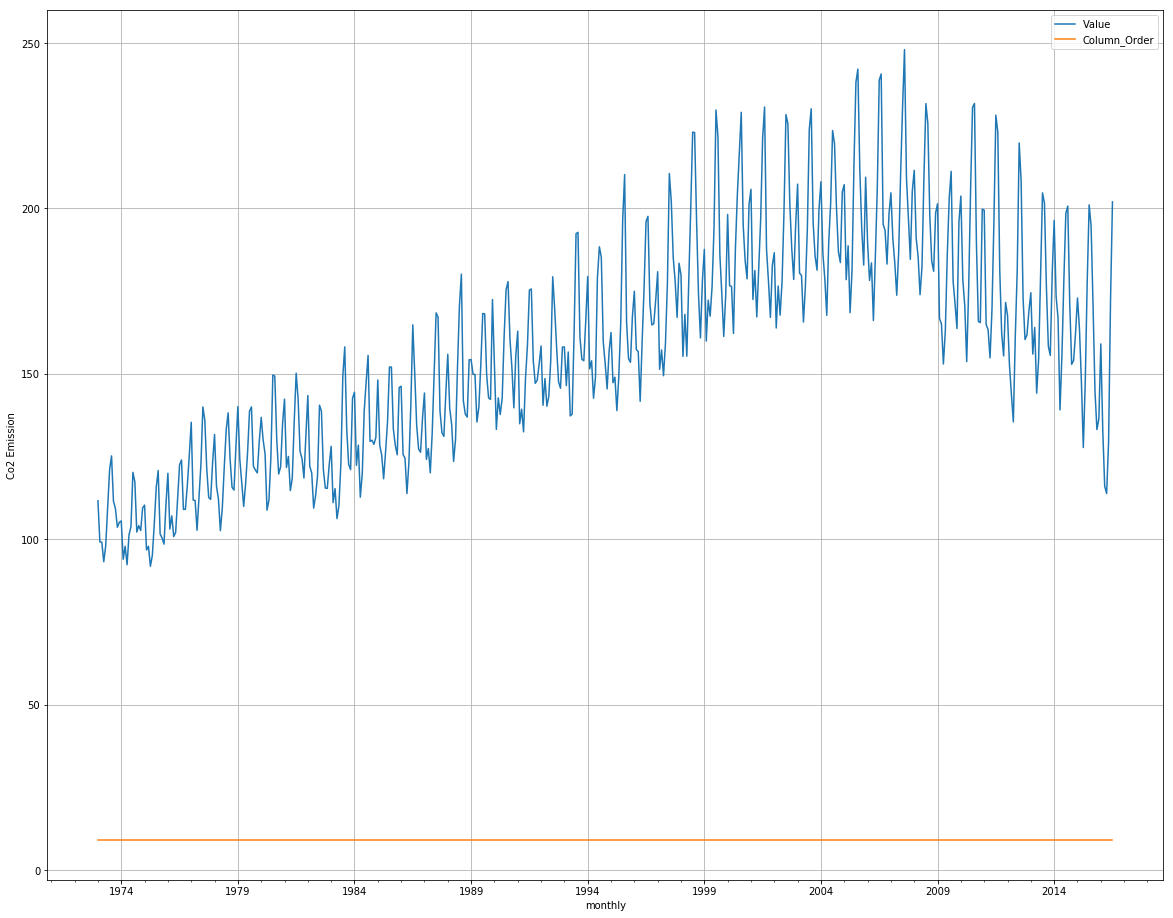

In [68]:
Energy_source.plot(grid=True)
plt.xlabel("monthly")
plt.ylabel("Co2 Emission")
plt.show()

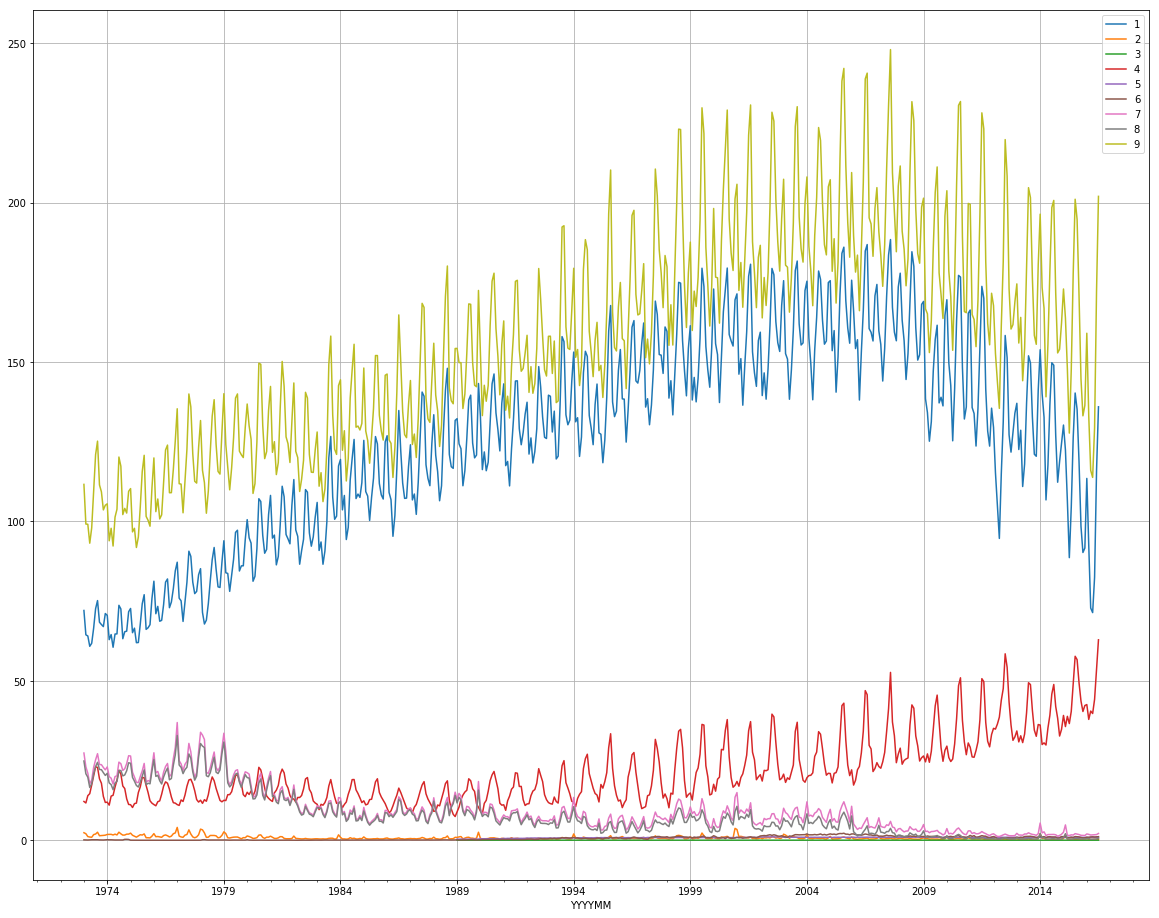

In [93]:
index=[1,2,3,4,5,6,7,8,9]
Energy_source['Value'].plot(grid=True)
plt.legend(labels=index, fontsize=10)
plt.show()

In [82]:
Energy_source.describe()

Column_Order            \
                                                          count mean  std   
Description                                                                 
Coal Electric Power Sector CO2 Emissions                  523.0  1.0  0.0   
Distillate Fuel, Including Kerosene-Type Jet Fu...        523.0  3.0  0.0   
Geothermal Energy Electric Power Sector CO2 Emi...        331.0  7.0  0.0   
Natural Gas Electric Power Sector CO2 Emissions           523.0  2.0  0.0   
Non-Biomass Waste Electric Power Sector CO2 Emi...        331.0  8.0  0.0   
Petroleum Coke Electric Power Sector CO2 Emissions        523.0  4.0  0.0   
Petroleum Electric Power Sector CO2 Emissions             523.0  6.0  0.0   
Residual Fuel Oil Electric Power Sector CO2 Emi...        523.0  5.0  0.0   
Total Energy Electric Power Sector CO2 Emissions          523.0  9.0  0.0   

                                                                             \
                                                    min  25%  50%  75%  max   
Description                                                                   
Coal Electric Power Sector CO2 Emissions            1.0  1.0  1.0  1.0  1.0   
Distillate Fuel, Including Kerosene-Type Jet Fu...  3.0  3.0  3.0  3.0  3.0   
Geothermal Energy Electric Power Sector CO2 Emi...  7.0  7.0  7.0  7.0  7.0   
Natural Gas Electric Power Sector CO2 Emissions     2.0  2.0  2.0  2.0  2.0   
Non-Biomass Waste Electric Power Sector CO2 Emi...  8.0  8.0  8.0  8.0  8.0   
Petroleum Coke Electric Power Sector CO2 Emissions  4.0  4.0  4.0  4.0  4.0   
Petroleum Electric Power Sector CO2 Emissions       6.0  6.0  6.0  6.0  6.0   
Residual Fuel Oil Electric Power Sector CO2 Emi...  5.0  5.0  5.0  5.0  5.0   
Total Energy Electric Power Sector CO2 Emissions    9.0  9.0  9.0  9.0  9.0   

                                                    Value              \
                                                    count        mean   
Description                                                             
Coal Electric Power Sector CO2 Emissions            523.0  125.778954   
Distillate Fuel, Including Kerosene-Type Jet Fu...  523.0    0.774163   
Geothermal Energy Electric Power Sector CO2 Emi...  331.0    0.031912   
Natural Gas Electric Power Sector CO2 Emissions     523.0   21.597245   
Non-Biomass Waste Electric Power Sector CO2 Emi...  331.0    0.850051   
Petroleum Coke Electric Power Sector CO2 Emissions  523.0    0.647772   
Petroleum Electric Power Sector CO2 Emissions       523.0    9.527711   
Residual Fuel Oil Electric Power Sector CO2 Emi...  523.0    8.105759   
Total Energy Electric Power Sector CO2 Emissions    523.0  157.462096   

                                                                       \
                                                          std     min   
Description                                                             
Coal Electric Power Sector CO2 Emissions            31.903910  60.544   
Distillate Fuel, Including Kerosene-Type Jet Fu...   0.558520   0.258   
Geothermal Energy Electric Power Sector CO2 Emi...   0.001861   0.025   
Natural Gas Electric Power Sector CO2 Emissions     10.585556   7.448   
Non-Biomass Waste Electric Power Sector CO2 Emi...   0.154092   0.335   
Petroleum Coke Electric Power Sector CO2 Emissions   0.585834   0.009   
Petroleum Electric Power Sector CO2 Emissions        7.127673   1.191   
Residual Fuel Oil Electric Power Sector CO2 Emi...   7.039863   0.334   
Total Energy Electric Power Sector CO2 Emissions    33.908393  91.834   

                                                                       \
                                                         25%      50%   
Description                                                             
Coal Electric Power Sector CO2 Emissions            102.0150  129.054   
Distillate Fuel, Including Kerosene-Type Jet Fu...    0.4310    0.561   
Geothermal Energy Electric Power Sector CO2 Emi...    0.03

KeyError: "DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',\n               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',\n               '1973-09-01', '1973-10-01',\n               ...\n               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',\n               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',\n               '2016-06-01', '2016-07-01'],\n              dtype='datetime64[ns]', name='YYYYMM', length=523, freq=None) not in index"

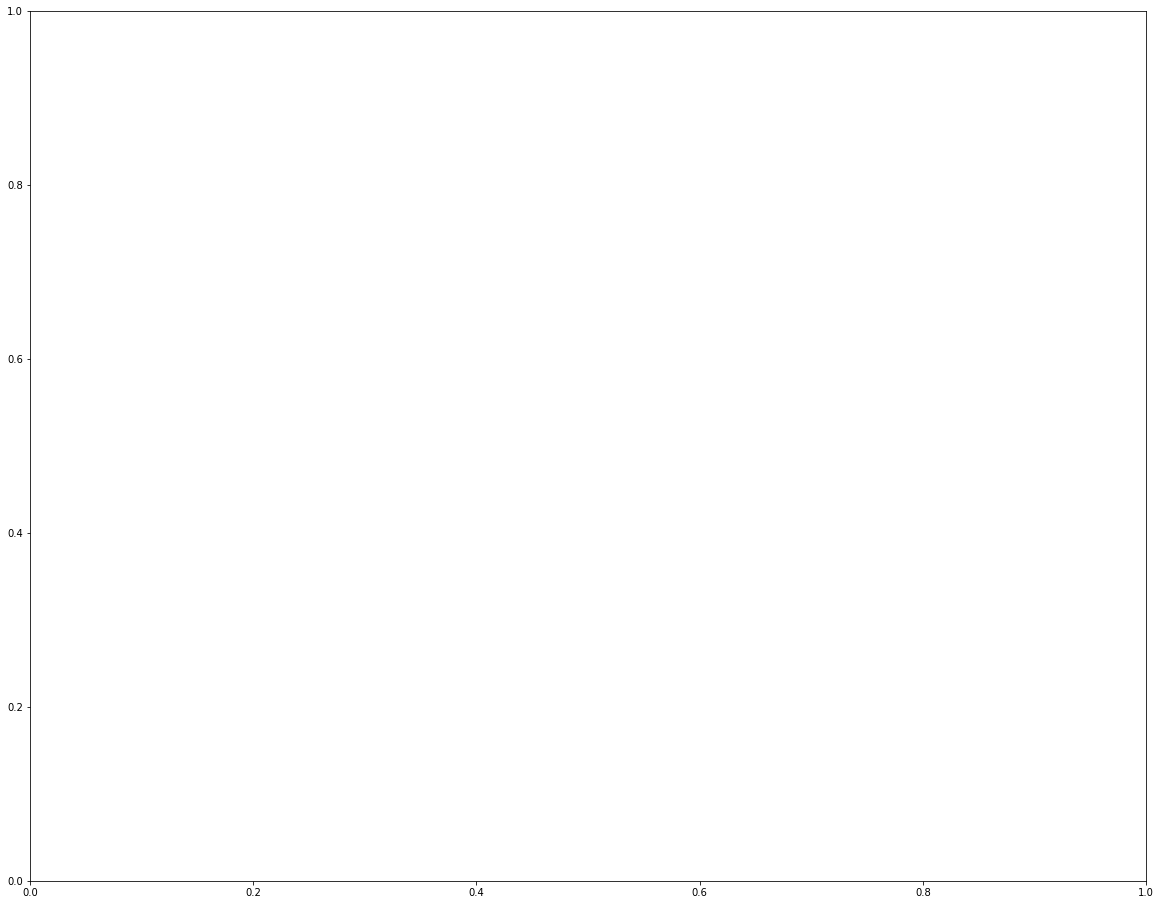

In [87]:
fig, ax = plt.subplots()
for desc, group in Energy_source:
    group.plot( group.index,'Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)